In [1]:
import tensorflow as tf
import numpy as np

In [2]:
learning_rate = 0.001
batch_size = 100
training_epochs = 25
nb_classes = 10

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train, x_test = x_train / 255.0, x_test / 255.0  # x_train.max() = 255
# change data shape
print(x_train.shape)  # (60000, 28, 28)
print(x_test.shape)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

(60000, 28, 28)
(10000, 28, 28)


In [6]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [7]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=10, input_dim = 28 * 28, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate), metrics=[tf.keras.metrics.Accuracy(), 'acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=training_epochs)

Epoch 1/25
600/600 [==============================] - 4s 4ms/step - loss: 0.9873 - accuracy: 0.0000e+00 - acc: 0.7486
Epoch 2/25
600/600 [==============================] - 2s 3ms/step - loss: 0.3579 - accuracy: 0.0000e+00 - acc: 0.9037
Epoch 3/25
600/600 [==============================] - 2s 3ms/step - loss: 0.3161 - accuracy: 0.0000e+00 - acc: 0.9121
Epoch 4/25
600/600 [==============================] - 2s 3ms/step - loss: 0.2974 - accuracy: 0.0000e+00 - acc: 0.9178
Epoch 5/25
600/600 [==============================] - 2s 3ms/step - loss: 0.2842 - accuracy: 0.0000e+00 - acc: 0.9205
Epoch 6/25
600/600 [==============================] - 2s 3ms/step - loss: 0.2737 - accuracy: 0.0000e+00 - acc: 0.9227
Epoch 7/25
600/600 [==============================] - 2s 3ms/step - loss: 0.2691 - accuracy: 0.0000e+00 - acc: 0.9232
Epoch 8/25
600/600 [==============================] - 2s 3ms/step - loss: 0.2707 - accuracy: 4.3766e-06 - acc: 0.9245
Epoch 9/25
600/600 [==============================] - 2s

In [9]:
predictions = model.predict(x_test)
print('Prediction: \n', np.argmax(predictions, axis=1))
x_train
score = model.evaluate(x_test, y_test)
print('Accuracy: ', score[1])

Prediction: 
 [7 2 1 ... 4 5 6]
313/313 [==============================] - 1s 3ms/step - loss: 0.2643 - accuracy: 2.0000e-05 - acc: 0.9269
Accuracy:  1.9999999494757503e-05


In [10]:
m = tf.keras.metrics.Accuracy()
m.update_state(np.argmax(predictions, axis=1), y_test.argmax(axis=1))
m.result().numpy()

0.9269

In [19]:
image = x_train[0].reshape(28, 28)

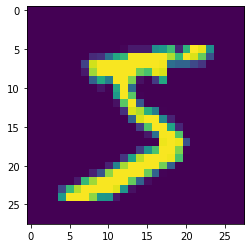

In [20]:
import matplotlib.pyplot as plt

plt.figure(55)
plt.imshow(image)
plt.show()

In [59]:
kernel1 = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])

In [60]:
image_pad = np.zeros([30, 30])
for i in range(28):
    for j in range(28):
        image_pad[1+i][1+j] = image[i][j]

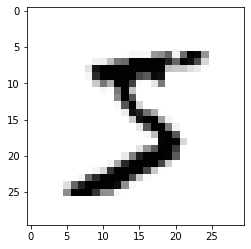

In [61]:
plt.figure(55)
plt.imshow(image_pad, cmap='Greys')
plt.show()

In [62]:
def filter(x, y):
    result = np.zeros([3, 3])
    for i in (x-1, x, x+1):
        for j in (y-1, y, y+1):
            result[i-(x-1)][j-(y-1)] = image_pad[i][j]
    return np.sum(result * kernel1)
            

conv_image = np.zeros([28, 28])
for i in range(1, 29):
    for j in range(1, 29):
        conv_image[i-1][j-1] = filter(i, j)
        
conv_image

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00

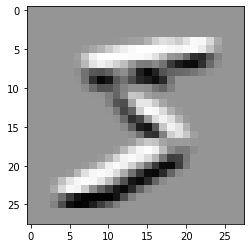

In [63]:
plt.figure(55)
plt.imshow(conv_image, cmap='Greys')
plt.show()

In [64]:
for i in range(28):
    for j in range(28):
        conv_image[i][j] = max(conv_image[i][j], 0)
conv_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

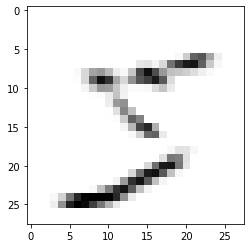

In [65]:
    
plt.figure(55)
plt.imshow(conv_image, cmap='Greys')
plt.show()